In [1]:
%matplotlib notebook
import sys
import matplotlib.pyplot as plt
import parse

from matplotlib.ticker import MaxNLocator

In [2]:
%%bash --bg --out output --err error
mpirun -np 2 --allow-run-as-root python3 -m train_lunar_lander --

Starting job # 0 in a separate thread.


In [3]:
mean_reward_parser = parse.compile('| EpRewMean       |{}|')
def extract_mean_reward_from_line(line):
    parsed_object = mean_reward_parser.parse(line)
    if parsed_object is not None:
        return float(parsed_object[0].strip())
    else:
        return None

In [4]:
from baselines import deepq
from xvfbwrapper import Xvfb
import gym

def callback(lcl, glb):
    # stop training if reward exceeds 199
    is_solved = lcl['t'] > 100 and sum(lcl['episode_rewards'][-101:-1]) / 100 >= 160
    if lcl['t'] % 100 == 0:
        ax.clear()
        ax.plot(lcl['episode_rewards'])
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_xlabel('Number of Episodes')
        ax.set_ylabel('Mean episode reward')
        ax.set_title('Mean Reward vs Episodes')
        fig.canvas.draw()
    return is_solved

def main():
    env = gym.make("LunarLander-v2")
    env = gym.wrappers.Monitor(env, directory='./lunar_lander', video_callable=lambda x: True, uid='bonsai', force=True)
    model = deepq.models.mlp([32])
    act = deepq.learn(
        env,
        q_func=model,
        lr=1e-3,
        max_timesteps=100000,
        buffer_size=50000,
        exploration_fraction=0.1,
        exploration_final_eps=0.02,
        print_freq=10,
        callback=callback
    )


<IPython.core.display.Javascript object>


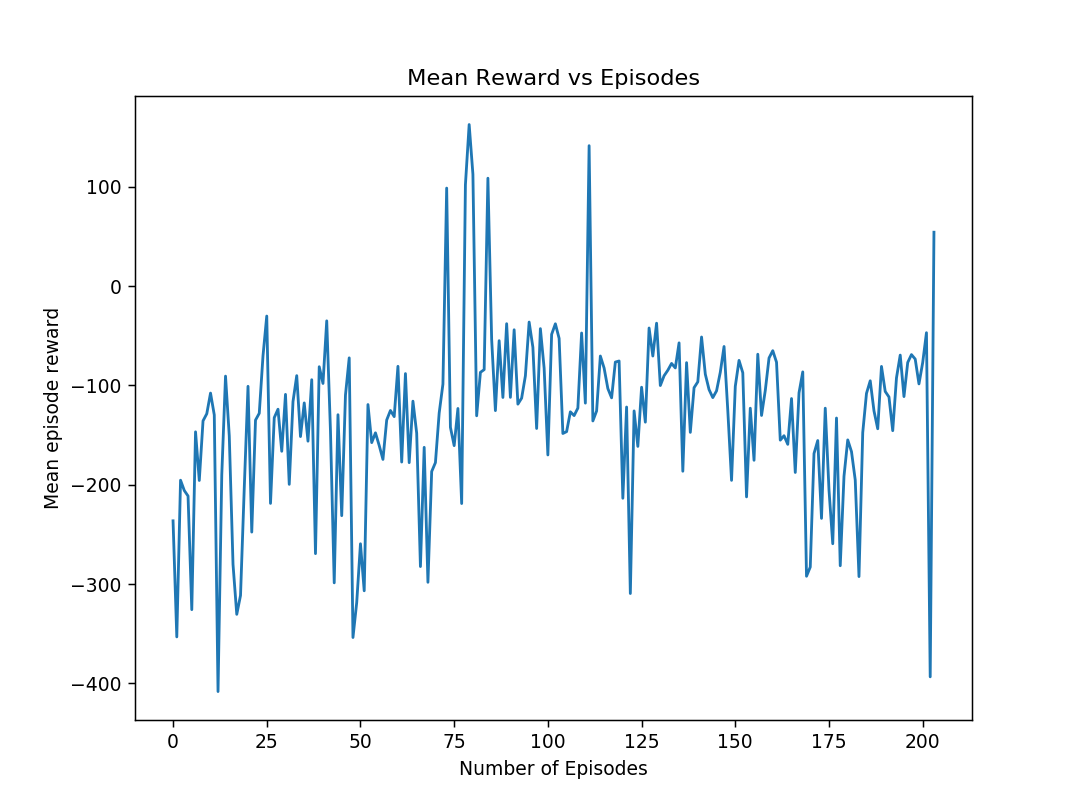

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.ion()

fig.show()
fig.canvas.draw()

mean_rewards = []
line = True
while True:
    line = output.readline()
    if not line:
        break
    mean_reward = extract_mean_reward_from_line(line.decode('utf-8'))
    if mean_reward is not None:
        mean_rewards.append(mean_reward)
        ax.clear()
        ax.plot(mean_rewards)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.set_xlabel('Number of Episodes')
        ax.set_ylabel('Mean episode reward')
        ax.set_title('Mean Reward vs Episodes')
        fig.canvas.draw()

In [6]:
display = Xvfb()
display.start()
main()
display.stop()

[2017-11-26 15:23:23,122] Making new env: LunarLander-v2
[2017-11-26 15:23:23,247] Clearing 166 monitor files from previous run (because force=True was provided)


Instructions for updating:
Use `argmax` instead


[2017-11-26 15:23:24,408] From /bonsai/baselines/baselines/deepq/build_graph.py:366: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `argmax` instead
[2017-11-26 15:23:25,966] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000000.mp4
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
[2017-11-26 15:23:32,505] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000001.mp4
[2017-11-26 15:23:37,395] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000002.mp4
[2017-11-26 15:23:41,699] Sta

--------------------------------------
| % time spent exploring  | 90       |
| episodes                | 10       |
| mean 100 episode reward | -223     |
| steps                   | 967      |
--------------------------------------


[2017-11-26 15:24:14,330] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000010.mp4
[2017-11-26 15:24:18,235] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000011.mp4
[2017-11-26 15:24:21,352] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000012.mp4
[2017-11-26 15:24:25,518] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000013.mp4
[2017-11-26 15:24:29,255] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000014.mp4
[2017-11-26 15:24:31,751] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000015.mp4
[2017-11-26 15:24:34,229] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 81       |
| episodes                | 20       |
| mean 100 episode reward | -218     |
| steps                   | 1896     |
--------------------------------------


[2017-11-26 15:24:43,436] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000020.mp4
[2017-11-26 15:24:46,405] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000021.mp4
[2017-11-26 15:24:49,500] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000022.mp4
[2017-11-26 15:24:51,946] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000023.mp4
[2017-11-26 15:24:55,806] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000024.mp4
[2017-11-26 15:24:59,382] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000025.mp4
[2017-11-26 15:25:02,414] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 67       |
| episodes                | 30       |
| mean 100 episode reward | -190     |
| steps                   | 3294     |
--------------------------------------


[2017-11-29 00:10:00,645] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000030.mp4
[2017-11-29 00:10:03,844] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000031.mp4
[2017-11-29 00:10:06,650] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000032.mp4
[2017-11-29 00:10:08,348] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000033.mp4
[2017-11-29 00:10:11,735] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000034.mp4
[2017-11-29 00:10:14,826] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000035.mp4
[2017-11-29 00:10:17,997] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 54       |
| episodes                | 40       |
| mean 100 episode reward | -179     |
| steps                   | 4615     |
--------------------------------------


[2017-11-29 00:10:31,896] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000040.mp4
[2017-11-29 00:10:35,548] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000041.mp4
[2017-11-29 00:10:39,079] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000042.mp4
[2017-11-29 00:10:41,434] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000043.mp4
[2017-11-29 00:10:44,605] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000044.mp4
[2017-11-29 00:10:49,791] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000045.mp4
[2017-11-29 00:10:52,983] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 34       |
| episodes                | 50       |
| mean 100 episode reward | -174     |
| steps                   | 6686     |
--------------------------------------


[2017-11-29 00:11:27,640] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000050.mp4
[2017-11-29 00:11:47,371] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000051.mp4
[2017-11-29 00:12:16,263] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000052.mp4
[2017-11-29 00:12:59,793] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000053.mp4
[2017-11-29 00:13:43,041] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000054.mp4
[2017-11-29 00:14:28,053] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000055.mp4
[2017-11-26 04:15:06,336] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 60       |
| mean 100 episode reward | -177     |
| steps                   | 15608    |
--------------------------------------


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
[2017-11-29 00:27:22,351] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000082.mp4
[2017-11-29 00:27:29,611] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000083.mp4
[2017-11-29 00:27:35,658] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000084.mp4
[2017-11-29 00:27:52,402] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000085.mp4
[2017-11-29 00:28:03,013] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000086.mp4
[2017-11-29 00:28:09,441] Starting new video recorde

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 90       |
| mean 100 episode reward | -151     |
| steps                   | 30090    |
--------------------------------------


[2017-11-29 00:28:57,880] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000090.mp4
[2017-11-29 00:29:07,320] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000091.mp4
[2017-11-29 00:29:13,994] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000092.mp4
[2017-11-29 00:29:18,561] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000093.mp4
[2017-11-29 00:29:23,234] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000094.mp4
[2017-11-29 00:29:29,087] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000095.mp4
[2017-11-29 00:29:38,368] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 100      |
| mean 100 episode reward | -144     |
| steps                   | 31843    |
--------------------------------------


[2017-11-29 00:30:00,147] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000100.mp4
[2017-11-29 00:30:06,511] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000101.mp4
[2017-11-29 00:30:15,269] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000102.mp4
[2017-11-29 00:30:24,708] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000103.mp4
[2017-11-29 00:30:34,028] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000104.mp4
[2017-11-29 00:31:07,761] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000105.mp4
[2017-11-29 00:31:15,529] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 110      |
| mean 100 episode reward | -133     |
| steps                   | 34156    |
--------------------------------------


[2017-11-29 00:31:43,771] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000110.mp4
[2017-11-29 00:31:48,708] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000111.mp4
[2017-11-29 00:32:01,914] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000112.mp4
[2017-11-29 00:32:33,587] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000113.mp4
[2017-11-29 00:33:18,202] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000114.mp4
[2017-11-29 00:33:25,712] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000115.mp4
[2017-11-29 00:34:09,269] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 120      |
| mean 100 episode reward | -119     |
| steps                   | 38863    |
--------------------------------------


[2017-11-29 00:35:33,406] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000120.mp4


Saving model due to mean reward increase: None -> -117.5


[2017-11-29 00:35:38,631] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000121.mp4
[2017-11-29 00:36:00,550] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000122.mp4
[2017-11-29 00:36:04,912] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000123.mp4
[2017-11-29 00:36:26,871] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000124.mp4
[2017-11-29 00:36:48,398] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000125.mp4
[2017-11-29 00:37:10,207] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000126.mp4
[2017-11-29 00:37:31,618] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 130      |
| mean 100 episode reward | -118     |
| steps                   | 46668    |
--------------------------------------


[2017-11-29 00:38:24,001] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000130.mp4
[2017-11-29 00:38:30,609] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000131.mp4
[2017-11-29 00:38:54,100] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000132.mp4
[2017-11-29 00:39:17,029] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000133.mp4


Saving model due to mean reward increase: -117.5 -> -115.7


[2017-11-29 00:39:39,312] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000134.mp4
[2017-11-29 00:40:02,075] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000135.mp4
[2017-11-29 00:40:24,329] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000136.mp4
[2017-11-29 00:40:28,598] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000137.mp4
[2017-11-29 00:40:49,349] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000138.mp4
[2017-11-29 00:40:54,681] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000139.mp4


--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 140      |
| mean 100 episode reward | -113     |
| steps                   | 54415    |
--------------------------------------


[2017-11-29 00:41:15,450] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000140.mp4
[2017-11-29 00:41:19,523] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000141.mp4
[2017-11-29 00:41:39,936] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000142.mp4
[2017-11-29 00:42:03,691] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000143.mp4
[2017-11-29 00:42:11,007] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000144.mp4
[2017-11-29 00:42:21,739] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000145.mp4
[2017-11-29 00:42:26,930] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 150      |
| mean 100 episode reward | -107     |
| steps                   | 58997    |
--------------------------------------


[2017-11-29 00:42:40,180] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000150.mp4
[2017-11-29 00:42:43,765] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000151.mp4
[2017-11-29 00:42:49,560] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000152.mp4


Saving model due to mean reward increase: -115.7 -> -101.8


[2017-11-29 00:43:11,312] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000153.mp4
[2017-11-29 00:43:14,089] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000154.mp4
[2017-11-29 00:43:17,789] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000155.mp4
[2017-11-29 00:43:27,040] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000156.mp4
[2017-11-29 00:43:49,312] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000157.mp4
[2017-11-29 00:44:10,916] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000158.mp4
[2017-11-29 00:44:32,521] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 160      |
| mean 100 episode reward | -101     |
| steps                   | 64266    |
--------------------------------------


[2017-11-29 00:44:53,981] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000160.mp4
[2017-11-29 00:44:57,831] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000161.mp4
[2017-11-29 00:45:01,391] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000162.mp4
[2017-11-29 00:45:23,552] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000163.mp4
[2017-11-29 00:45:30,962] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000164.mp4
[2017-11-29 00:45:40,282] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000165.mp4
[2017-11-29 00:46:03,965] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

Saving model due to mean reward increase: -101.8 -> -98.4


[2017-11-29 00:46:51,114] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000168.mp4
[2017-11-29 00:47:12,806] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000169.mp4


--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 170      |
| mean 100 episode reward | -95.8    |
| steps                   | 71335    |
--------------------------------------


[2017-11-29 00:47:32,945] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000170.mp4
[2017-11-29 00:47:53,416] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000171.mp4
[2017-11-29 00:48:14,416] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000172.mp4
[2017-11-29 00:48:35,744] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000173.mp4
[2017-11-29 00:48:49,069] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000174.mp4
[2017-11-29 00:48:52,333] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000175.mp4
[2017-11-29 00:49:06,919] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 180      |
| mean 100 episode reward | -107     |
| steps                   | 78835    |
--------------------------------------


[2017-11-29 00:50:04,832] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000180.mp4
[2017-11-29 00:50:26,020] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000181.mp4
[2017-11-29 00:50:32,677] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000182.mp4
[2017-11-29 00:50:39,204] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000183.mp4
[2017-11-29 00:50:59,090] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000184.mp4
[2017-11-29 00:51:20,664] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000185.mp4
[2017-11-29 00:51:42,951] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 190      |
| mean 100 episode reward | -120     |
| steps                   | 86623    |
--------------------------------------


[2017-11-29 00:53:07,082] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000190.mp4
[2017-11-29 00:53:27,828] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000191.mp4
[2017-11-29 00:53:48,843] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000192.mp4
[2017-11-29 00:54:09,666] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000193.mp4
[2017-11-29 00:54:31,659] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000194.mp4
[2017-11-29 00:54:53,077] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000195.mp4
[2017-11-29 00:55:14,905] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.vi

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 200      |
| mean 100 episode reward | -122     |
| steps                   | 96623    |
--------------------------------------


[2017-11-29 00:56:41,302] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000200.mp4
[2017-11-29 00:57:03,367] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000201.mp4
[2017-11-29 00:57:24,623] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000202.mp4
[2017-11-29 00:57:26,165] Starting new video recorder writing to /bonsai/baselines/tutorials/lunar_lander/openaigym.video.0.bonsai.video000203.mp4


Restored model with mean reward: -98.4
INFO:tensorflow:Restoring parameters from /tmp/tmpz3for4bu/model


[2017-11-29 00:57:33,059] Restoring parameters from /tmp/tmpz3for4bu/model
[2017-11-29 00:57:33,271] Finished writing results. You can upload them to the scoreboard via gym.upload('/bonsai/baselines/tutorials/lunar_lander')
